In [1]:
import xarray as xr
import numpy as np
import cftime
#import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time

import nc_time_axis

%matplotlib inline 

In [2]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#                                S O L A R   M I N  
#-----------------------------------------------------------------------------------------------------------------------------------------------------

filename = './Nc_Files/arc4/cesm_sims/archive/cesm213_MIon_SMin_FX2000_f19f19mg16_2/atm/hist/cesm213_MIon_SMin_FX2000_f19f19mg16_2.cam.h1.0001-01-*.nc'
ds = xr.open_mfdataset(filename)
ds

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 744, mlat: 97, mlon: 80, lev: 126, ilev: 127, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * mlat          (mlat) float64 -90.0 -88.12 -86.24 -84.33 ... 86.24 88.12 90.0
  * mlon          (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * lev           (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev          (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time          (time) object 0001-01-01 00:00:00 ... 0001-01-31 23:00:00
Dimensions without coordinates: nbnd
Data variables: (12/114)
    gw            (time, lat) float64 dask.array<chunksize=(24, 96), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    ...            ...
    UI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    V             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    VI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    WI            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    Z3            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    e             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cesm213_MIon_SMin_FX2000_f19f19mg16_2
    logname:           sestay
    host:              
    initial_file:      /home/home02/sestay/WACCM_Input_Files/acp-21-15619-202...
    topography_file:   /nobackup/CESM/inputdata/atm/cam/topo/USGS-gtopo30_1.9...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

In [42]:
timee = ds.variables['time']

start_cftime_date = '0001-01-01'
times = xr.cftime_range(start=start_cftime_date, periods=744, freq="1H", calendar="noleap")    

timess = np.arange(0,744, dtype=float)
timess = timess/24

timesss = cftime.date2num(timee, units="hours since 0001-01-01", calendar="noleap", has_year_zero=True)
timesss = cftime.num2date(timesss, units="hours since 0001-01-01", calendar="noleap", has_year_zero=True)
#------------------------------------

lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']
dst = ds.transpose("lev", ...)

temp = dst.variables['T']
elect = dst.variables['e']
Fep = dst.variables['Fep']  #(126, 744, 96, 144)

geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

#------------------------------------
##lev_sl_idx_min = 41 #upper lim
##lev_sl_idx_max = 66 #lower lim
##Array lev = 6.0e-03hPa : 1.1e-05hPa (approx 81km : 128km)

lev_sl_idx_min = 21 #upper lim
lev_sl_idx_max = 66 #lower lim

lev_sl = lev[lev_sl_idx_min:lev_sl_idx_max+1]
Zavg_sl = Zavg[lev_sl_idx_min:lev_sl_idx_max+1]

print('Array lev = ' + str("%.1e" % lev[lev_sl_idx_max] ) + 'hPa : ' + str("%.1e" % lev[lev_sl_idx_min] ) + 'hPa'
           + ' (approx ' + str("%.0f" % Zavg[lev_sl_idx_max]) + 'km : ' + str("%.0f" % Zavg[lev_sl_idx_min] ) + 'km' + ')'   )

#Slice arrays over lev dim
Fep_sl = Fep[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]
elec_sl = elect[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]
temp_sl = temp[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]

# VMR to number density calculation
Fepdens = ( Fep_sl * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * temp_sl) 
edens = ( elec_sl * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * temp_sl) #(26, 744, 96, 144)


Array lev = 6.0e-03hPa : 7.7e-08hPa (approx 81km : 253km)


In [43]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#                                S O L A R   M A X  
#-----------------------------------------------------------------------------------------------------------------------------------------------------

filename2 = './Nc_Files/arc4/cesm_sims/archive/cesm213_MIon_SMax_FX2000_f19f19mg16_2/atm/hist/cesm213_MIon_SMax_FX2000_f19f19mg16_2.cam.h1.0001-01-*.nc'
ds2 = xr.open_mfdataset(filename2)
#ds

In [44]:
timee2 = ds2.variables['time']

#------------------------------------

lon2 = ds2.variables['lon']
lat2 = ds2.variables['lat']
lev2 = ds2.variables['lev']
dst2 = ds2.transpose("lev", ...)

temp2 = dst2.variables['T']
elect2 = dst2.variables['e']
Fep2 = dst2.variables['Fep']  #(126, 744, 96, 144)

geopH2 = dst2.variables['Z3'] / 1000 #m-> km
Zavg2 = geopH.mean(('time','lat', 'lon'))

#------------------------------------

lev_sl2 = lev2[lev_sl_idx_min:lev_sl_idx_max+1]
Zavg_sl2 = Zavg2[lev_sl_idx_min:lev_sl_idx_max+1]

print('Array lev = ' + str("%.1e" % lev2[lev_sl_idx_max] ) + 'hPa : ' + str("%.1e" % lev2[lev_sl_idx_min] ) + 'hPa'
           + ' (approx ' + str("%.0f" % Zavg2[lev_sl_idx_max]) + 'km : ' + str("%.0f" % Zavg2[lev_sl_idx_min] ) + 'km' + ')'   )

#Slice arrays over lev dim
Fep_sl2 = Fep2[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]
elec_sl2 = elect2[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]
temp_sl2 = temp2[lev_sl_idx_min:lev_sl_idx_max+1, :,:,:]

# VMR to number density calculation
Fepdens2 = ( Fep_sl2 * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * temp_sl2) 
edens2 = ( elec_sl2 * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * temp_sl2) #(26, 744, 96, 144)


Array lev = 6.0e-03hPa : 7.7e-08hPa (approx 81km : 253km)


In [45]:
#Plot variables 

#------------Slice lat between ~75-85' -------------
#lat[88] #76.73684211
#lat[92] #84.31578947
latsl = lat[88:93]
#latsl.shape #5
#latsl #[76.736842, 78.631579, 80.526316, 82.421053, 84.315789]


#------------Zonal averages -------------
#-----SMin--------
#edens.shape #(26, 744, 96, 144)
edens_lonavg = edens.mean(dim="lon")
#edens_lonavg.shape #(26, 744, 96)
Fepdens_lonavg = Fepdens.mean(dim="lon")
#-----SMax--------
edens2_lonavg = edens2.mean(dim="lon")
Fepdens2_lonavg = Fepdens2.mean(dim="lon")
#-------------

#------------Slice variables and avg between ~75-85' lat -------------
#-----SMin--------
edens_polarsl = edens_lonavg[:,:,88:93]
#edens_polarsl.shape #(26, 744, 5)
edens_polarslav = np.mean(edens_polarsl, axis=2)
#edens_polarslav.shape #(26, 744)
Fepdens_polarsl = Fepdens_lonavg[:,:,88:93]
Fepdens_polarslav = np.mean(Fepdens_polarsl, axis=2)
#-----SMax--------
edens2_polarsl = edens2_lonavg[:,:,88:93]
edens2_polarslav = np.mean(edens2_polarsl, axis=2)
Fepdens2_polarsl = Fepdens2_lonavg[:,:,88:93]
Fepdens2_polarslav = np.mean(Fepdens2_polarsl, axis=2)

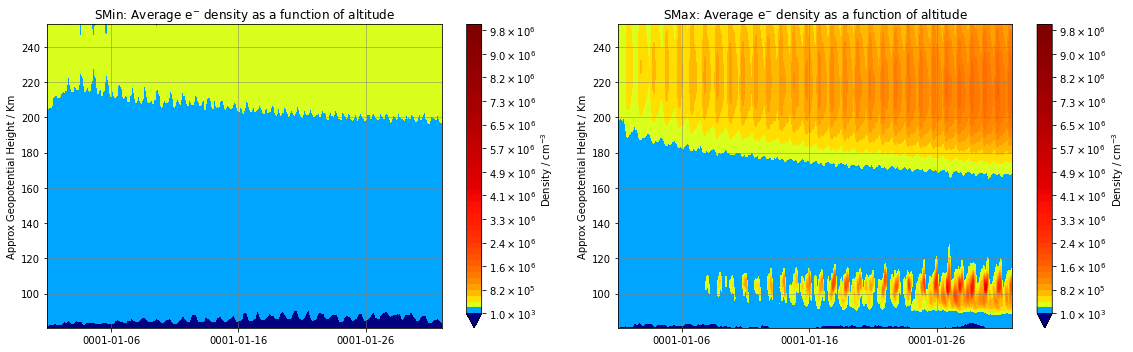

In [56]:
#  e- density at SMin and SMax

#====================================================================================
ticks = np.linspace(1*10**1, 1*10**6, 30)
ticks2 = np.linspace(1*10**3, 1*10**7, 50)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

C1 = ax1.contourf(timesss, Zavg_sl, edens_polarslav,    
                 levels=ticks2,
                 locator=ticker.LogLocator(),
                 extend='min',
                 cmap=jet)

#-------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
            
cbar = fig.colorbar(C1, ax=ax1,format=ticker.FuncFormatter(fmt),ticks=ticks2[::4])     #)##fraction=0.023, , pad=0.12
cbar.set_label('Density / cm$^{-3}$')
#-------------------

ax1.set_ylabel('Approx Geopotential Height / Km')
#ax1.set_xlabel('Time')

ax1.set_title( 'SMin: Average e$^{-}$ density as a function of altitude' )

ax1.grid(axis='both',color = 'grey', linestyle = '-', linewidth = 0.5)

#plt.tight_layout()

#path = './Figures/'
#figname= '.png'
#plt.savefig(path+figname, dpi = 400) #
#====================================================================================
#ticks2 = np.linspace(1*10**1, 3*10**5, 30)

C2 = ax2.contourf(timesss, Zavg_sl2, edens2_polarslav,    
                 levels=ticks2,
                 locator=ticker.LogLocator(),
                 extend='min',
                 cmap=jet)

#-------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
            
cbar = fig.colorbar(C2, ax=ax2, format=ticker.FuncFormatter(fmt), ticks=ticks2[::4])  #   #)##fraction=0.023, pad=0.12,
cbar.set_label('Density / cm$^{-3}$')
#-------------------

ax2.set_ylabel('Approx Geopotential Height / Km')
#ax2.set_xlabel('Time')

ax2.set_title( 'SMax: Average e$^{-}$ density as a function of altitude' )

ax2.grid(axis='both',color = 'grey', linestyle = '-', linewidth = 0.5)

#plt.tight_layout()

#path = './Figures/'
#figname= '.png'
#plt.savefig(path+figname, dpi = 400) 
##====================================================================================

plt.tight_layout()


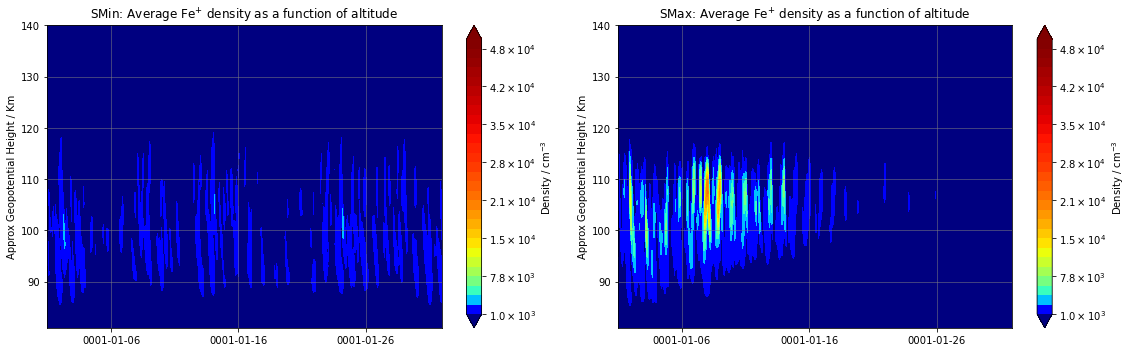

In [75]:
#  Fe+ density at SMin and SMax

#====================================================================================
ticks = np.linspace(1*10**1, 1*10**6, 30)
ticks2 = np.linspace(1*10**3, 5*10**4, 30)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

C1 = ax1.contourf(timesss, Zavg_sl, Fepdens_polarslav,    
                 levels=ticks2,
                 locator=ticker.LogLocator(),
                 extend='both',
                 cmap=jet)

#-------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
            
cbar = fig.colorbar(C1, ax=ax1,format=ticker.FuncFormatter(fmt),ticks=ticks2[::4])     #)##fraction=0.023, , pad=0.12
cbar.set_label('Density / cm$^{-3}$')
#-------------------

ax1.set_ylabel('Approx Geopotential Height / Km')
#ax1.set_xlabel('Time')

ax1.set_title( 'SMin: Average Fe$^{+}$ density as a function of altitude' )

ax1.grid(axis='both',color = 'grey', linestyle = '-', linewidth = 0.5)

ax1.set_ylim(81,140)


#plt.tight_layout()

#path = './Figures/'
#figname= '.png'
#plt.savefig(path+figname, dpi = 400) #
#====================================================================================
#ticks2 = np.linspace(1*10**1, 3*10**5, 30)

C2 = ax2.contourf(timesss, Zavg_sl2, Fepdens2_polarslav,    
                 levels=ticks2,
                 locator=ticker.LogLocator(),
                 extend='both',
                 cmap=jet)

#-------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
            
cbar = fig.colorbar(C2, ax=ax2, format=ticker.FuncFormatter(fmt), ticks=ticks2[::4])  #   #)##fraction=0.023, pad=0.12,
cbar.set_label('Density / cm$^{-3}$')
#-------------------

ax2.set_ylabel('Approx Geopotential Height / Km')
#ax2.set_xlabel('Time')

ax2.set_title( 'SMax: Average Fe$^{+}$ density as a function of altitude' )

ax2.grid(axis='both',color = 'grey', linestyle = '-', linewidth = 0.5)

ax2.set_ylim(81,140)


#plt.tight_layout()

#path = './Figures/'
#figname= '.png'
#plt.savefig(path+figname, dpi = 400) 
##====================================================================================

plt.tight_layout()
